#### Location de velos de MMICorporation

In [ ]:
# lecture du fichier et affichage des 5 1ere lignes
import pandas as pd
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head(5)

In [ ]:
#ajout d'une colonne day (manipulation des données)
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)

In [ ]:
# Separation variables et etiquettes
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Variables:',X[:10], '\nEtiquettes:', y[:10], sep='\n')

In [ ]:
#(manipulation des données)
from sklearn.model_selection import train_test_split

# Split data 70%-30% en données entrainement et données de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Données entrainement: %d rows\nDonnées de test: %d rows' % (X_train.shape[0], X_test.shape[0]))

In [8]:
# Entrainement du model
from sklearn.linear_model import LinearRegression

# Regression lineaire sur les données d'entrainement
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [10]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Libellés prédits: ', np.round(predictions)[:10])
print('Étiquettes réelles    : ' ,y_test[:10])

Libellés prédits:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Étiquettes réelles    :  [2418  754  222   47  244  145  240  555 3252   38]


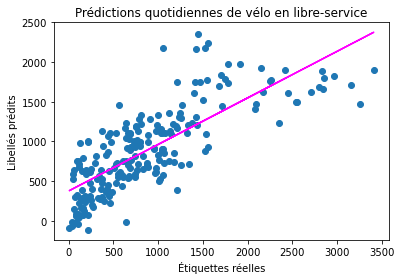

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Étiquettes réelles')
plt.ylabel('Libellés prédits')
plt.title('Prédictions quotidiennes de vélo en libre-service')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [12]:
# evaluation de la prediction
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, predictions)
print("R2:", r2)

R2: 0.6040454736919191


## c'est tres moyen